### Matplotlib Plots - Part 2
Oct 12, 2019

Working with basic type of plots available using matplotlib.
Data set used:
1. red wine data set - for bar and pie plots
2. Housing dataset - for histogram and scatter plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [8]:
wine = pd.read_csv('winequality-red.csv')

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Bar Plot

In [26]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

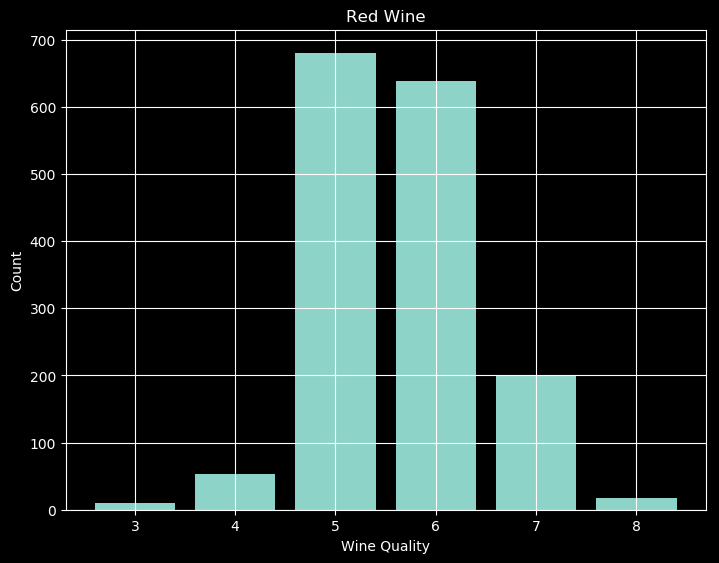

In [40]:
plt.style.use('default')
plt.style.use('dark_background')
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])
plt.bar(wine.quality.value_counts().index, wine.quality.value_counts().values)
axes.set_xlabel('Wine Quality')
axes.set_ylabel('Count')
axes.set_title('Red Wine')
axes.grid('True')

##### Horizontal Bar Plot

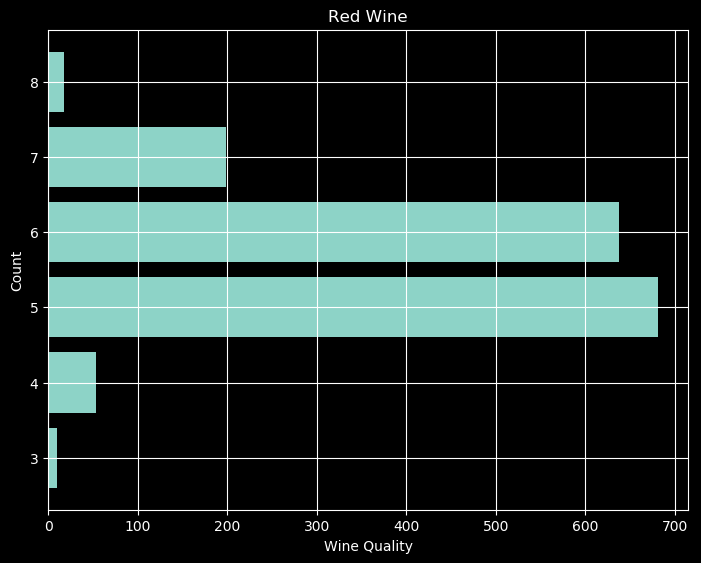

In [39]:
plt.style.use('default')
plt.style.use('dark_background')
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])
plt.barh(wine.quality.value_counts().index, wine.quality.value_counts().values)
axes.set_xlabel('Wine Quality')
axes.set_ylabel('Count')
axes.set_title('Red Wine')
axes.grid('True')

##### Pie Chart

In [41]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
def classify_wine_quality(quality):
    if quality < 5:
        return 'poor quality'
    elif ((quality >= 5) and (quality < 7)):
        return 'normal quality'
    else:
        return 'excellent quality'
    
wine['quality classification'] = wine['quality'].apply(classify_wine_quality)

In [43]:
wine_pie = wine['quality classification'].value_counts()

In [44]:
labels = wine_pie.index
sizes = wine_pie.values
#colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0.1, 0)  # explode 1st slice

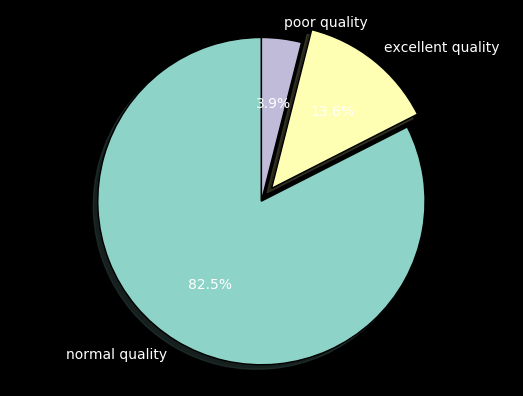

In [45]:
#plt.style.use('default')
#plt.style.use('seaborn-muted')

plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={'edgecolor':'black'})

#autopct - to display percentage
#shadow = to show shadow (aesthetic only)
#wedgeprops - to add color to the edges of the pie

plt.axis('equal')
plt.savefig('wine_quality')

##### Histogram

In [46]:
housing = pd.read_csv('USA_Housing.csv')

In [47]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [49]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


##### Histogram Plot

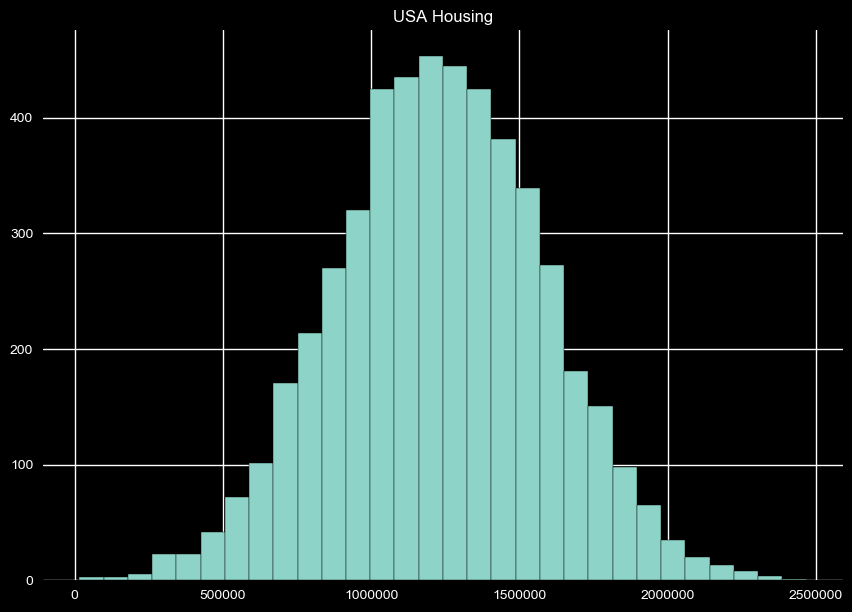

In [63]:
#create the blank figure canvas
plt.style.use('dark_background')
fig = plt.figure()

#add the axes
axes = fig.add_axes([0, 0, 1, 1])
plt.hist(housing['Price'], bins=30, edgecolor='black')
#axes.set_xlabel('Number of Rooms')
#axes.set_ylabel('Price')
axes.set_title('USA Housing')
plt.grid('True')

##### Scatter Plots

Text(0.5,1,'Area Population vs Price')

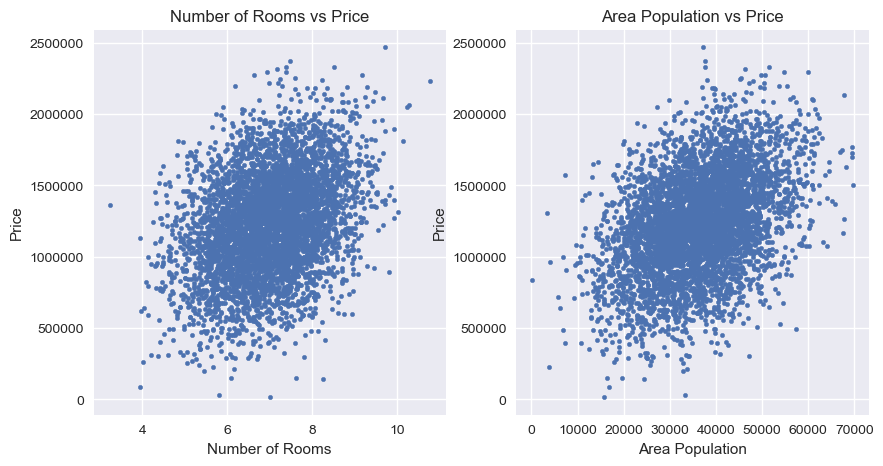

In [67]:
#create the blank figure canvas
plt.style.use('seaborn')
fig, axes = plt.subplots(figsize=(10,5), nrows=1, ncols=2)

axes[0].scatter(housing['Avg. Area Number of Rooms'], housing['Price'], s=10)
axes[0].set_xlabel('Number of Rooms')
axes[0].set_ylabel('Price')
axes[0].set_title('Number of Rooms vs Price')

axes[1].scatter(housing['Area Population'], housing['Price'], s=10)
axes[1].set_xlabel('Area Population')
axes[1].set_ylabel('Price')
axes[1].set_title('Area Population vs Price')